<a href="https://colab.research.google.com/github/Joh-Ishimwe/Data-Preprocessing/blob/master/final_data_processing_steps_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Augmentation
# Done by ISHIMWE Josiane

Objective: Expand an existing dataset using synthetic data, perturbation, and augmentation techniques.


# Load the dataset

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
path = '/content/customer_transactions.csv'
df = pd.read_csv(path)

# Display first 10 rows
df.head(10)

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3
5,120,1006,395,2024-01-06,Groceries,1.1
6,182,1007,91,2024-01-07,Sports,4.9
7,186,1008,429,2024-01-08,Clothing,4.3
8,174,1009,228,2024-01-09,Electronics,3.8
9,174,1010,112,2024-01-10,Sports,2.6


In [2]:
# Get information about data types and missing values
df.info()

# Get summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id_legacy  150 non-null    int64  
 1   transaction_id      150 non-null    int64  
 2   purchase_amount     150 non-null    int64  
 3   purchase_date       150 non-null    object 
 4   product_category    150 non-null    object 
 5   customer_rating     140 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.2+ KB


,customer_id_legacy,transaction_id,purchase_amount,customer_rating
count,150.000000,150.000000,150.000000,140.00000
mean,148.760000,1075.500000,280.780000,2.98500
std,30.046425,43.445368,121.329595,1.20699
min,100.000000,1001.000000,51.000000,1.00000
25%,121.250000,1038.250000,179.000000,1.95000
50%,150.500000,1075.500000,274.000000,3.00000
75%,174.750000,1112.750000,388.500000,4.00000
max,199.000000,1150.000000,495.000000,5.00000


#Step 2: Data Cleaning & Handling Missing Values

In [3]:
# Check for missing values
print(df.isnull().sum())

customer_id_legacy     0
transaction_id         0
purchase_amount        0
purchase_date          0
product_category       0
customer_rating       10
dtype: int64


In [4]:
# Method 1: Mean Imputation
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
df_mean = df.copy()
df_mean['customer_rating'] = mean_imputer.fit_transform(df[['customer_rating']])

# Method 2: Median Imputation
median_imputer = SimpleImputer(strategy='median')
df_median = df.copy()
df_median['customer_rating'] = median_imputer.fit_transform(df[['customer_rating']])

# Method 3: Mode Imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode = df.copy()
df_mode['customer_rating'] = mode_imputer.fit_transform(df[['customer_rating']])


df['customer_rating'] = df_median['customer_rating']

In [5]:
# Other imputation alternative for 'purchase_amount' (if it had missing values)
# df['purchase_amount'].fillna(df['purchase_amount'].mean(), inplace=True)

# Other imputation alternative for 'product_category' (if it had missing values)
df['product_category'].fillna(df['product_category'].mode()[0], inplace=True)


<ipython-input-5-48bfc583938d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product_category'].fillna(df['product_category'].mode()[0], inplace=True)


In [6]:
# Check for missing values again
print(df.isnull().sum())

customer_id_legacy    0
transaction_id        0
purchase_amount       0
purchase_date         0
product_category      0
customer_rating       0
dtype: int64


#Step 3: Data Augmentation Strategies

In [7]:
# Let Product_category be the target variable
target_distribution = df['product_category'].value_counts()

# Print the target distribution
print(target_distribution)

product_category
Sports         35
Electronics    34
Clothing       28
Groceries      28
Books          25
Name: count, dtype: int64


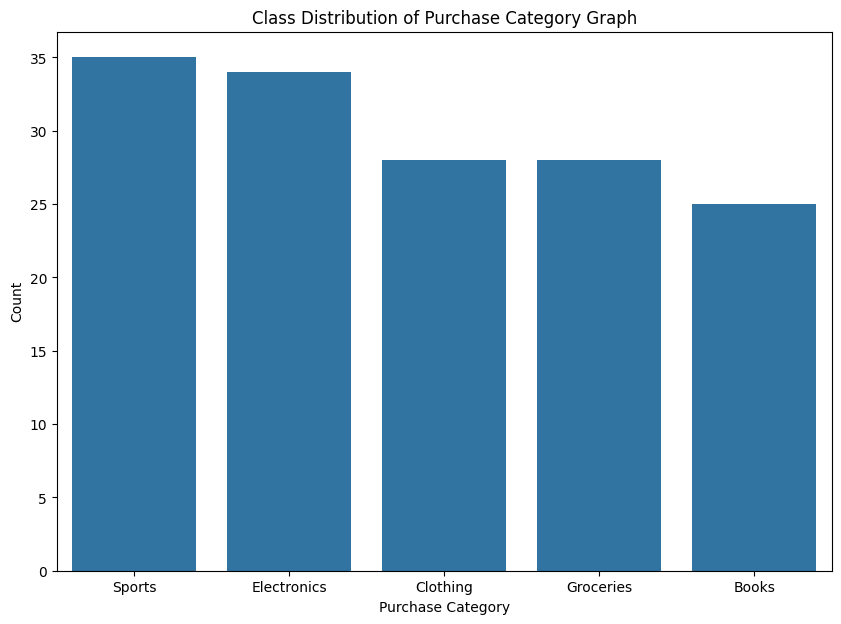

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the class distribution
plt.figure(figsize=(10, 7))
sns.countplot(x='product_category', data=df)
plt.title('Class Distribution of Purchase Category Graph')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.show()

In [9]:
# Add random noise to purchase_amount
noise = np.random.normal(0, 10, size=len(df))
df['purchase_amount'] = df['purchase_amount'] + noise

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['product_category_encoded'] = le.fit_transform(df['product_category'])


In [11]:
# Apply SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols_for_smote = [col for col in numerical_cols if col != 'purchase_date']
X = df[numerical_cols_for_smote]
y = df['product_category']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [12]:
#Create a DataFrame with resampled data
df_resampled = pd.DataFrame(X_resampled, columns=numerical_cols_for_smote)
# Instead of assigning original values, repeat the purchase_date values to match the new length
df_resampled['purchase_date'] = np.tile(df['purchase_date'].values, int(np.ceil(len(df_resampled) / len(df))))[:len(df_resampled)]
df_resampled['product_category'] = y_resampled

print("Before SMOTE:\n", df['product_category'].value_counts())
print("After SMOTE:\n", pd.Series(y_resampled).value_counts())
print(df_resampled['product_category'].value_counts())
print(df_resampled.dtypes)


Before SMOTE:
 product_category
Sports         35
Electronics    34
Clothing       28
Groceries      28
Books          25
Name: count, dtype: int64
After SMOTE:
 product_category
Sports         35
Electronics    35
Clothing       35
Groceries      35
Books          35
Name: count, dtype: int64
product_category
Sports         35
Electronics    35
Clothing       35
Groceries      35
Books          35
Name: count, dtype: int64
customer_id_legacy            int64
transaction_id                int64
purchase_amount             float64
customer_rating             float64
product_category_encoded      int64
purchase_date                object
product_category             object
dtype: object


In [13]:
# Feature Value Transformation
for col in numerical_cols:
    skewness = df_resampled[col].skew()
    print(f"Skewness of {col}: {skewness}")
    if skewness > 1:
        df_resampled[f'{col}_log'] = np.log1p(df_resampled[col])

# Display the updated DataFrame
print("\nDataFrame After Feature Transformation:")
print(df_resampled.head())

Skewness of customer_id_legacy: -0.13007495985787818
Skewness of transaction_id: -0.05079640537644151
Skewness of purchase_amount: 2.9437376782564407e-05
Skewness of customer_rating: -0.09181977744427018
Skewness of product_category_encoded: 0.0

DataFrame After Feature Transformation:
   customer_id_legacy  transaction_id  purchase_amount  customer_rating  \
0                 151            1001       398.903745              2.3   
1                 192            1002       321.866746              4.2   
2                 114            1003       450.441980              2.1   
3                 171            1004       258.162225              2.8   
4                 160            1005        61.832200              1.3   

   product_category_encoded purchase_date product_category  
0                         4    2024-01-01           Sports  
1                         2    2024-01-02      Electronics  
2                         2    2024-01-03      Electronics  
3                 

In [14]:
#  Data Expansion
augmented_data = []
target_samples_per_class = 42


#Synthetic Data Generation

In [15]:
# 3. Synthetic Data Generation
# This function generates synthetic data by introducing variations to existing data points.
# It helps to increase the size of the dataset and improve model generalization.
# The variations are applied to purchase amount, product category, purchase date, and customer rating.

def generate_synthetic_data(df, num_samples=100):
    synthetic_data = df.sample(n=num_samples, replace=True).copy()  # <- Fix: Ensure a new copy

    # Apply variations
    synthetic_data['purchase_amount'] *= np.random.uniform(0.9, 1.1, size=num_samples)
    synthetic_data['product_category'] = np.random.choice(df['product_category'].unique(), size=num_samples)

    # Convert and modify dates
    synthetic_data['purchase_date'] = pd.to_datetime(synthetic_data['purchase_date'], errors='coerce')
    synthetic_data['purchase_date'] += pd.to_timedelta(np.random.randint(-3, 3, size=num_samples), unit='days')

    # Modify customer ratings within valid range
    synthetic_data['customer_rating'] += np.random.uniform(-0.2, 0.2, size=num_samples)
    synthetic_data['customer_rating'] = synthetic_data['customer_rating'].clip(lower=df['customer_rating'].min(),
                                                                              upper=df['customer_rating'].max())

    return synthetic_data

# Generate synthetic data and combine
synthetic_data = generate_synthetic_data(df)
df_augmented = pd.concat([df_resampled, synthetic_data], ignore_index=True)

# Check results
print("\nShape of Augmented Dataset:", df_augmented.shape)
print("\nClass Distribution After Data Expansion:")
print(df_augmented['product_category'].value_counts())



Shape of Augmented Dataset: (275, 7)

Class Distribution After Data Expansion:
product_category
Groceries      56
Clothing       55
Electronics    55
Books          55
Sports         54
Name: count, dtype: int64


#Feature Engineering

In [16]:
# 1. Extract purchase_month
df_augmented['purchase_month'] = pd.to_datetime(df_augmented['purchase_date']).dt.month

# 2. Calculate avg_purchase_amount per customer
avg_purchase = df_augmented.groupby('customer_id_legacy')['purchase_amount'].mean().reset_index()
avg_purchase.columns = ['customer_id_legacy', 'avg_purchase_amount']
df_augmented = pd.merge(df_augmented, avg_purchase, on='customer_id_legacy', how='left')

In [17]:
# 3. Calculate days_since_last_purchase
df_augmented.sort_values(by=['customer_id_legacy', 'purchase_date'], inplace=True)
df_augmented['purchase_date'] = pd.to_datetime(df_augmented['purchase_date'], errors='coerce')
df_augmented.dropna(subset=['purchase_date'], inplace=True)
df_augmented['days_since_last_purchase'] = df_augmented.groupby('customer_id_legacy')['purchase_date'].diff().dt.days
df_augmented['days_since_last_purchase'].fillna(0, inplace=True)

<ipython-input-17-f5db9a43e470>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_augmented['days_since_last_purchase'].fillna(0, inplace=True)


#Export the Augmented Dataset

In [18]:
# Save the augmented dataset
df_augmented.to_csv('customer_transactions_augmented.csv', index=False)

# Part 2 Merging Datasets with Transitive Properties

In [1]:
import pandas as pd

try:
    transactions_df = pd.read_csv('customer_transactions_augmented.csv')
    profiles_df = pd.read_csv('customer_social_profiles.csv')
    mapping_df = pd.read_csv('id_mapping.csv')
    print("Datasets loaded successfully!")
except FileNotFoundError:
    print("One or more dataset files not found. Please ensure they are uploaded to Colab.")
    exit()

    print("\n--- Transactions Data ---")
print(transactions_df.head())
print(transactions_df.info())

print("\n--- Profiles Data ---")
print(profiles_df.head())
print(profiles_df.info())

print("\n--- Mapping Data ---")
print(mapping_df.head())
print(mapping_df.info())

Datasets loaded successfully!
   customer_id_legacy  transaction_id  purchase_amount  customer_rating  \
0                 100            1113       159.006970         3.934884   
1                 100            1147       389.033357         4.535987   
2                 100            1147       371.725595         4.575863   
3                 100            1130       377.512049         4.218168   
4                 100            1113       154.793733         4.000000   

   product_category_encoded purchase_date product_category  purchase_month  \
0                         1    2024-04-24        Groceries               4   
1                         0    2024-05-24            Books               5   
2                         0    2024-05-25           Sports               5   
3                         0    2024-01-10            Books               1   
4                         1    2024-04-22         Clothing               4   

   avg_purchase_amount  days_since_last_purchase  

#Prepare the Mapping DataFrame

In [2]:
mapping_df = mapping_df.rename(columns={'customer_id_legacy': 'legacy_id'})
print("\nMapping DataFrame after renaming column:")
print(mapping_df.head())


Mapping DataFrame after renaming column:
   legacy_id customer_id_new
0        195            A105
1        161            A118
2        192            A156
3        157            A168
4        166            A102


#Merge the Transactions DataFrame with the Mapping DataFrame

In [3]:
mapping_df = mapping_df.rename(columns={'customer_id_legacy': 'legacy_id'})
transactions_mapped = pd.merge(transactions_df, mapping_df, left_on='customer_id_legacy', right_on='legacy_id', how='left')
final_merged_df = pd.merge(transactions_mapped, profiles_df, on='customer_id_new', how='left')
print("\nFinal merged DataFrame (initial merge):")
print(final_merged_df.head())


Final merged DataFrame (initial merge):
   customer_id_legacy  transaction_id  purchase_amount  customer_rating  \
0                 100            1113       159.006970         3.934884   
1                 100            1147       389.033357         4.535987   
2                 100            1147       371.725595         4.575863   
3                 100            1130       377.512049         4.218168   
4                 100            1113       154.793733         4.000000   

   product_category_encoded purchase_date product_category  purchase_month  \
0                         1    2024-04-24        Groceries               4   
1                         0    2024-05-24            Books               5   
2                         0    2024-05-25           Sports               5   
3                         0    2024-01-10            Books               1   
4                         1    2024-04-22         Clothing               4   

   avg_purchase_amount  days_since_last

In [4]:
final_merged_df_cleaned = final_merged_df.dropna(subset=['customer_id_new']).copy()
print("\nCleaned merged DataFrame (after dropping unmapped transactions):")
print(final_merged_df_cleaned.head())
print(final_merged_df_cleaned.info())


Cleaned merged DataFrame (after dropping unmapped transactions):
    customer_id_legacy  transaction_id  purchase_amount  customer_rating  \
6                  101            1073       132.377883         2.297554   
7                  101            1073       132.377883         2.297554   
8                  101            1073       132.377883         2.297554   
9                  101            1073       132.377883         2.297554   
10                 101            1073       132.377883         2.297554   

    product_category_encoded purchase_date product_category  purchase_month  \
6                          0    2024-03-11            Books               3   
7                          0    2024-03-11            Books               3   
8                          0    2024-03-11            Books               3   
9                          0    2024-03-11            Books               3   
10                         0    2024-03-11            Books               3   

  

#Handling Potential One-to-Many Mappings

In [5]:
# Check for one-to-many mappings in id_mapping.csv
legacy_counts = mapping_df['legacy_id'].value_counts()
conflicts = legacy_counts[legacy_counts > 1]
print(f"\nNumber of legacy IDs with multiple new IDs: {len(conflicts)}")

if not conflicts.empty:
    print("Legacy IDs with multiple mappings:")
    print(conflicts)
    print("\nHandling conflicts by keeping the first mapping encountered for each legacy ID.")
    # Keep only the first occurrence of each legacy_id in the mapping
    mapping_df_unique = mapping_df.drop_duplicates(subset=['legacy_id'], keep='first')

    # Remerge using the unique mapping
    transactions_mapped_unique = pd.merge(transactions_df, mapping_df_unique, left_on='customer_id_legacy', right_on='legacy_id', how='left')
    final_merged_df = pd.merge(transactions_mapped_unique, profiles_df, on='customer_id_new', how='left')

    print("Final merged DataFrame after handling one-to-many mappings:")
    print(final_merged_df.head())
    print(final_merged_df.info())
else:
    print("No one-to-many mappings found in the id_mapping.csv.")


Number of legacy IDs with multiple new IDs: 49
Legacy IDs with multiple mappings:
legacy_id
197    5
128    5
192    4
121    4
195    4
139    3
157    3
162    3
199    3
159    3
126    3
112    3
158    3
116    3
163    3
178    3
146    3
131    3
174    3
138    3
125    2
198    2
105    2
166    2
155    2
187    2
179    2
132    2
176    2
190    2
106    2
145    2
111    2
101    2
177    2
129    2
181    2
130    2
109    2
167    2
136    2
175    2
144    2
152    2
141    2
196    2
191    2
183    2
180    2
Name: count, dtype: int64

Handling conflicts by keeping the first mapping encountered for each legacy ID.
Final merged DataFrame after handling one-to-many mappings:
   customer_id_legacy  transaction_id  purchase_amount  customer_rating  \
0                 100            1113       159.006970         3.934884   
1                 100            1147       389.033357         4.535987   
2                 100            1147       371.725595         4.575863   

#Checking for Unmapped IDs

In [6]:
# Check for unmapped legacy IDs
unmapped_legacy_ids = transactions_mapped['customer_id_new'].isnull().sum()
print(f"\nNumber of transactions with unmapped legacy IDs: {unmapped_legacy_ids}")

if unmapped_legacy_ids > 0:
    print("Consider how to handle these unmapped transactions (e.g., dropping them or investigating the missing mappings).")



Number of transactions with unmapped legacy IDs: 56
Consider how to handle these unmapped transactions (e.g., dropping them or investigating the missing mappings).


#Handling Missing Values

In [7]:
print("\nMissing values in the final merged DataFrame:")
print(final_merged_df.isnull().sum())


Missing values in the final merged DataFrame:
customer_id_legacy           0
transaction_id               0
purchase_amount              0
customer_rating              0
product_category_encoded     0
purchase_date                0
product_category             0
purchase_month               0
avg_purchase_amount          0
days_since_last_purchase     0
legacy_id                   56
customer_id_new             56
social_media_platform       98
engagement_score            98
purchase_interest_score     98
review_sentiment            98
dtype: int64


#Identify Available Columns

In [8]:
print("\n--- Columns in final_merged_df_cleaned before Feature Engineering ---")
print(final_merged_df_cleaned.columns)


--- Columns in final_merged_df_cleaned before Feature Engineering ---
Index(['customer_id_legacy', 'transaction_id', 'purchase_amount',
       'customer_rating', 'product_category_encoded', 'purchase_date',
       'product_category', 'purchase_month', 'avg_purchase_amount',
       'days_since_last_purchase', 'legacy_id', 'customer_id_new',
       'social_media_platform', 'engagement_score', 'purchase_interest_score',
       'review_sentiment'],
      dtype='object')


#Feature Engineering

# Customer Engagement Score

In [9]:
# Calculate transaction count per customer (using customer_id_new as the identifier)
final_merged_df_cleaned['transaction_count'] = final_merged_df_cleaned.groupby('customer_id_new')['transaction_id'].transform('count')

# Normalize transaction count
final_merged_df_cleaned['normalized_transactions'] = (final_merged_df_cleaned['transaction_count'] - final_merged_df_cleaned['transaction_count'].min()) / (final_merged_df_cleaned['transaction_count'].max() - final_merged_df_cleaned['transaction_count'].min())

# Check for the actual social media activity column
social_activity_column = 'engagement_score'

if social_activity_column in final_merged_df_cleaned.columns:
    # Normalize social media activity
    final_merged_df_cleaned['normalized_social_activity'] = (final_merged_df_cleaned[social_activity_column] - final_merged_df_cleaned[social_activity_column].min()) / (final_merged_df_cleaned[social_activity_column].max() - final_merged_df_cleaned[social_activity_column].min())

    # Combine them to create an engagement score (adjust weights as needed)
    final_merged_df_cleaned['engagement_score'] = 0.5 * final_merged_df_cleaned['normalized_transactions'] + 0.5 * final_merged_df_cleaned['normalized_social_activity']
    print(f"\nCustomer Engagement Score created (including {social_activity_column}).")
else:
    print(f"\nColumn '{social_activity_column}' not found. Engagement score based on transaction count only.")
    final_merged_df_cleaned['engagement_score'] = final_merged_df_cleaned['normalized_transactions']

print(final_merged_df_cleaned[['customer_id_new', 'transaction_count', 'engagement_score']].head())


Customer Engagement Score created (including engagement_score).
   customer_id_new  transaction_count  engagement_score
6             A116                 65          0.785714
7             A116                 65          0.897959
8             A116                 65          0.816327
9             A116                 65          0.836735
10            A116                 65          0.785714


#Predictive Behavioral Features

In [10]:
# Ensure 'purchase_date' is in datetime format
if 'purchase_date' in final_merged_df_cleaned.columns:
    final_merged_df_cleaned['purchase_date'] = pd.to_datetime(final_merged_df_cleaned['purchase_date'])
    final_merged_df_cleaned = final_merged_df_cleaned.sort_values(by=['customer_id_new', 'purchase_date'])

    # Moving average of purchase amount (e.g., over the last 3 transactions)
    if 'purchase_amount' in final_merged_df_cleaned.columns:
        final_merged_df_cleaned['moving_average_spent_3'] = final_merged_df_cleaned.groupby('customer_id_new')['purchase_amount'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
        print("\nMoving average of purchase amount created.")
    else:
        print("\nColumn 'purchase_amount' not found, skipping moving average.")

    # Time-based aggregation: Monthly total spending
    final_merged_df_cleaned['month_year'] = final_merged_df_cleaned['purchase_date'].dt.to_period('M')
    monthly_spending = final_merged_df_cleaned.groupby(['customer_id_new', 'month_year'])['purchase_amount'].sum().reset_index()
    monthly_spending = monthly_spending.rename(columns={'purchase_amount': 'monthly_total_spent'})
    final_merged_df_cleaned = pd.merge(final_merged_df_cleaned, monthly_spending, on=['customer_id_new', 'month_year'], how='left')
    print("Monthly total spending aggregated.")

    print(final_merged_df_cleaned[['customer_id_new', 'purchase_date', 'moving_average_spent_3', 'monthly_total_spent']].head())
else:
    print("\nColumn 'purchase_date' not found. Skipping moving averages and time-based aggregation.")
    print(final_merged_df_cleaned[['customer_id_new']].head())


Moving average of purchase amount created.
Monthly total spending aggregated.
  customer_id_new purchase_date  moving_average_spent_3  monthly_total_spent
0            A101    2024-01-22              204.303131           416.359942
1            A101    2024-01-22              208.179971           416.359942
2            A101    2024-02-13              304.237712           496.353195
3            A102    2024-02-03               85.451374           561.611759
4            A102    2024-02-04               83.873443           561.611759


#TF-IDF on Text Data

In [11]:
# Check for text-based columns for TF-IDF
review_col = 'review_sentiment'

if review_col in final_merged_df_cleaned.columns:
    print(f"\nColumn '{review_col}' found. TF-IDF is typically used on raw text. This column contains sentiment scores, which is already a numerical feature.")

    print("Review sentiment scores will be used as a feature.")
else:
    print("\nNo relevant text columns found for TF-IDF. Skipping TF-IDF.")

print(final_merged_df_cleaned[['customer_id_new', 'review_sentiment']].head())
print(final_merged_df_cleaned.info())


Column 'review_sentiment' found. TF-IDF is typically used on raw text. This column contains sentiment scores, which is already a numerical feature.
Review sentiment scores will be used as a feature.
  customer_id_new review_sentiment
0            A101          Neutral
1            A101          Neutral
2            A101          Neutral
3            A102          Neutral
4            A102          Neutral
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id_legacy          660 non-null    int64         
 1   transaction_id              660 non-null    int64         
 2   purchase_amount             660 non-null    float64       
 3   customer_rating             660 non-null    float64       
 4   product_category_encoded    660 non-null    int64         
 5   purchase_date               660 

#Export the Final Preprocessed Data

In [12]:
group_number = "7"
output_filename = f'final_customer_data_{7}.csv'
final_merged_df.to_csv(output_filename, index=False)
print(f"\nFinal preprocessed data saved to: {output_filename}")


Final preprocessed data saved to: final_customer_data_7.csv


# Part 3: Data Consistency and Quality Checks
# Done by: Liliane Kayitesi

# 1. Data Integrity Checks

In [13]:
import pandas as pd
df = pd.read_csv("final_customer_data_7.csv")


# a. Checking for duplicate entries

In [14]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 8


In [15]:
# Inspecting duplicate
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

     customer_id_legacy  transaction_id  purchase_amount  customer_rating  \
6                   101            1073       132.377883         2.297554   
10                  101            1073       132.377883         2.297554   
11                  101            1017       266.003799         2.100000   
15                  101            1017       266.003799         2.100000   
16                  101            1021       173.752289         3.400000   
20                  101            1021       173.752289         3.400000   
21                  101            1059       410.584224         2.500000   
25                  101            1059       410.584224         2.500000   
26                  101            1073       125.725733         2.100000   
30                  101            1073       125.725733         2.100000   
184                 144            1107       438.205946         3.260792   
188                 144            1107       438.205946         3.260792   

In [16]:
# dropping duplicates
df = df.drop_duplicates()
print(f"Shape after dropping duplicates: {df.shape}")

Shape after dropping duplicates: (421, 16)


# b. Ensuring all categorical values are correctly mapped.

In [17]:
# Inspecting categorical columns
print("Unique product categories:", df['product_category'].unique())
print("Unique social media platforms:", df['social_media_platform'].unique())
print("Unique review sentiments:", df['review_sentiment'].unique())

Unique product categories: ['Groceries' 'Books' 'Sports' 'Clothing' 'Electronics']
Unique social media platforms: [nan 'Twitter' 'LinkedIn' 'Instagram' 'TikTok' 'Facebook']
Unique review sentiments: [nan 'Negative' 'Neutral' 'Positive']


In [18]:
df['social_media_platform'] = df['social_media_platform'].fillna('None')
df['review_sentiment'] = df['review_sentiment'].fillna('Unknown')

# c. Validating if customer transactions match a valid social profile

In [19]:
social_rows = df[df['social_media_platform'].notna()]
print(f"Rows with social media: {len(social_rows)}")

Rows with social media: 421


In [20]:
#Check for missing engagement data
missing_engagement = social_rows[social_rows[['engagement_score', 'purchase_interest_score', 'review_sentiment']].isna().any(axis=1)]
print(f"Rows with missing engagement data: {len(missing_engagement)}")
print(missing_engagement[['customer_id_legacy', 'transaction_id', 'social_media_platform']])

Rows with missing engagement data: 98
     customer_id_legacy  transaction_id social_media_platform
0                   100            1113                  None
1                   100            1147                  None
2                   100            1147                  None
3                   100            1130                  None
4                   100            1113                  None
..                  ...             ...                   ...
334                 184            1096                  None
335                 185            1139                  None
405                 194            1088                  None
406                 194            1088                  None
407                 194            1088                  None

[98 rows x 3 columns]


In [21]:
df = df.dropna(subset=['engagement_score', 'purchase_interest_score', 'review_sentiment'], how='all')

# 2. Statistical Summarization

# a. Generating describe() reports for numerical columns

In [22]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(df[numerical_cols].describe())

       customer_id_legacy  transaction_id  purchase_amount  customer_rating  \
count          421.000000      421.000000       421.000000       421.000000   
mean           151.235154     1077.513064       280.974546         3.044597   
std             30.878630       42.433735       120.576183         1.127671   
min            100.000000     1001.000000        61.194202         1.000000   
25%            125.000000     1038.000000       172.884095         2.297554   
50%            150.000000     1079.000000       267.505318         3.000000   
75%            182.000000     1115.000000       397.939206         4.000000   
max            199.000000     1150.000000       506.429242         5.000000   

       product_category_encoded  purchase_month  avg_purchase_amount  \
count                421.000000      421.000000           421.000000   
mean                   2.028504        2.828979           280.974546   
std                    1.471683        1.452163            88.984531   


# b. Visualizing distribution of transaction amounts

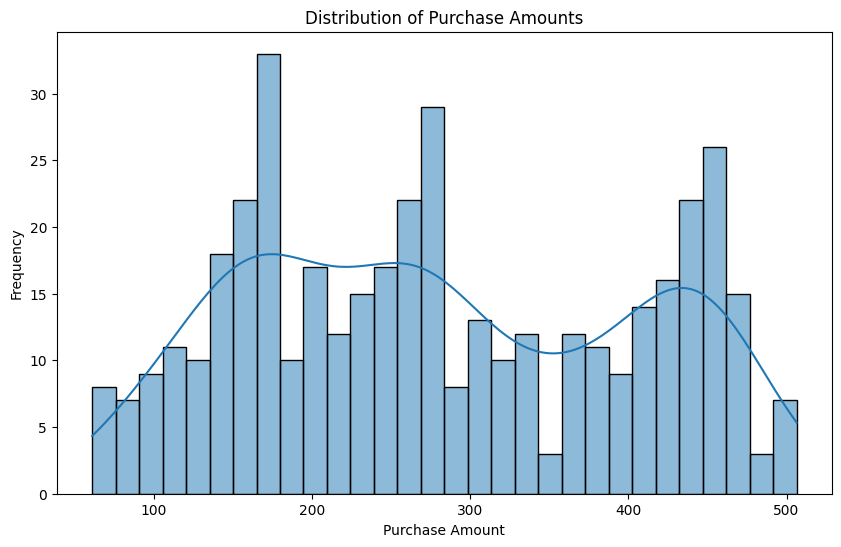

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['purchase_amount'], bins=30, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# 3. Feature Selection for Machine Learning

# a. Identifying highly correlated features using a correlation heatmap

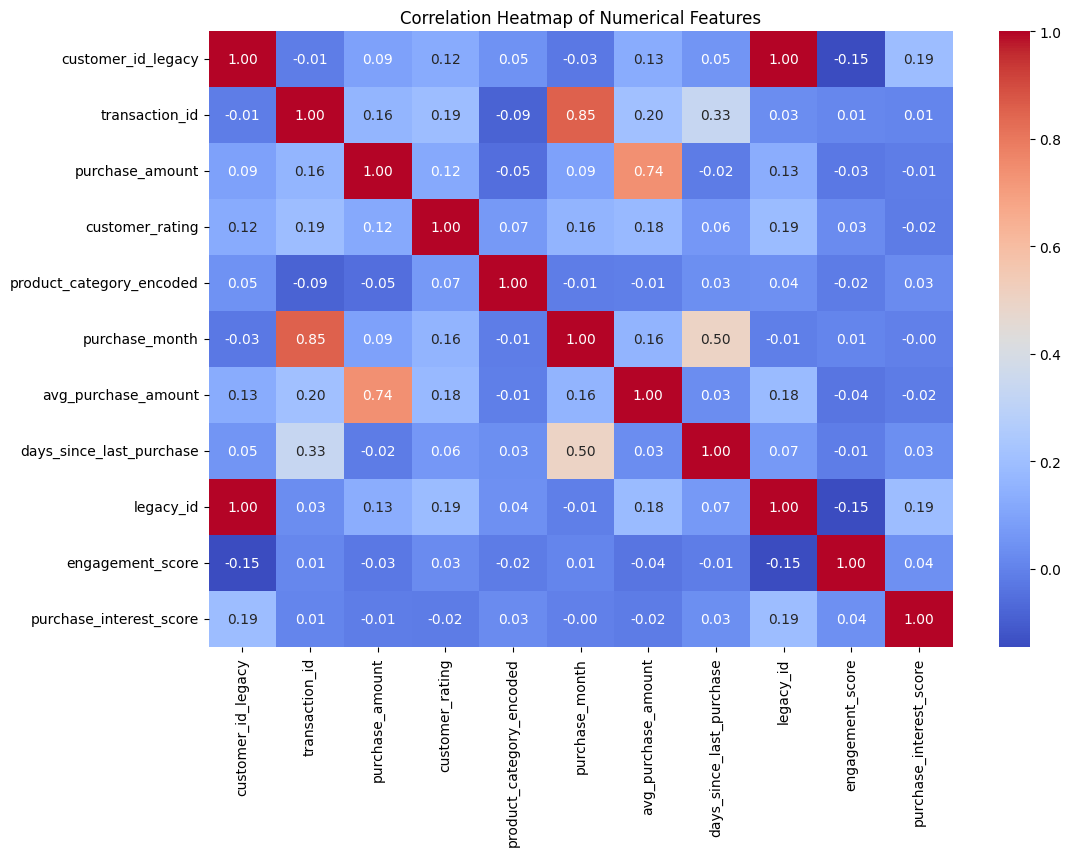

In [24]:
# Correlation heatmap
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# b. Selecting top 10 most important features

In [25]:
# Selecting the top 10 most important features using a feature selection algorithm.

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the DataFrame after dropping NaNs
df_ml = df.dropna().copy()

# Encoding categorical columns
le = LabelEncoder()
for col in ['product_category', 'social_media_platform', 'review_sentiment']:
    df_ml.loc[:, col] = le.fit_transform(df_ml[col])

# Definining features (X) and target (y) and dropping all non-numeric identifier columns
X = df_ml.drop(columns=['purchase_amount', 'customer_id_legacy', 'transaction_id',
                        'purchase_date', 'customer_id_new', 'legacy_id'])
y = df_ml['purchase_amount']

# Fit Random Forest and getting feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Features:\n", importances.head(10))

Top 10 Features:
 avg_purchase_amount         0.617603
days_since_last_purchase    0.120928
customer_rating             0.113452
product_category_encoded    0.034669
purchase_month              0.030361
product_category            0.023017
purchase_interest_score     0.016721
engagement_score            0.016669
review_sentiment            0.015002
social_media_platform       0.011577
dtype: float64


# Final Data Export

In [26]:
df.to_csv('final_dataset_ready_7.csv', index=False)
print("Dataset saved as 'final_dataset_ready_7.csv'")

Dataset saved as 'final_dataset_ready_7.csv'


# Machine Learning Model to Predict Customer Spending

In [27]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

df = pd.read_csv('final_dataset_ready_7.csv')

print("Dataset loaded. Shape:", df.shape)
print(df.head())

Dataset loaded. Shape: (421, 16)
   customer_id_legacy  transaction_id  purchase_amount  customer_rating  \
0                 100            1113       159.006970         3.934884   
1                 100            1147       389.033357         4.535987   
2                 100            1147       371.725595         4.575863   
3                 100            1130       377.512049         4.218168   
4                 100            1113       154.793733         4.000000   

   product_category_encoded purchase_date product_category  purchase_month  \
0                         1    2024-04-24        Groceries               4   
1                         0    2024-05-24            Books               5   
2                         0    2024-05-25           Sports               5   
3                         0    2024-01-10            Books               1   
4                         1    2024-04-22         Clothing               4   

   avg_purchase_amount  days_since_last_purchas

In [28]:
# Creating a machine learning-ready copy
df_ml = df.dropna().copy()

# Encoding categorical columns
le = LabelEncoder()
for col in ['product_category', 'social_media_platform', 'review_sentiment']:
    df_ml.loc[:, col] = le.fit_transform(df_ml[col])

# Defining features (X) and target (y)
X = df_ml.drop(columns=['purchase_amount', 'customer_id_legacy', 'transaction_id',
                        'purchase_date', 'customer_id_new', 'legacy_id'])
y = df_ml['purchase_amount']

# Splittng into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Features in X:", X.columns.tolist())

Training set shape: (258, 10)
Testing set shape: (65, 10)
Features in X: ['customer_rating', 'product_category_encoded', 'product_category', 'purchase_month', 'avg_purchase_amount', 'days_since_last_purchase', 'social_media_platform', 'engagement_score', 'purchase_interest_score', 'review_sentiment']


In [37]:
import joblib
# Saving the trained model
model_filename = 'random_forest_model.pkl'
joblib.dump(rf, model_filename)
print(f"Model saved as {model_filename}")

print("Model trained and saved successfully!")


Model saved as random_forest_model.pkl
Model trained and saved successfully!


In [38]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Performing 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Average CV R² Score: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")

Mean Squared Error (MSE): 2561.46
Root Mean Squared Error (RMSE): 50.61
R² Score: 0.83
Cross-Validation R² Scores: [0.24441951 0.69385412 0.28843747 0.41909967 0.45239605]
Average CV R² Score: 0.42 ± 0.16


Top 10 Feature Importances:
 avg_purchase_amount         0.615815
days_since_last_purchase    0.132628
customer_rating             0.101489
product_category_encoded    0.034937
purchase_month              0.030013
purchase_interest_score     0.021043
product_category            0.019328
engagement_score            0.015936
review_sentiment            0.015735
social_media_platform       0.013076
dtype: float64


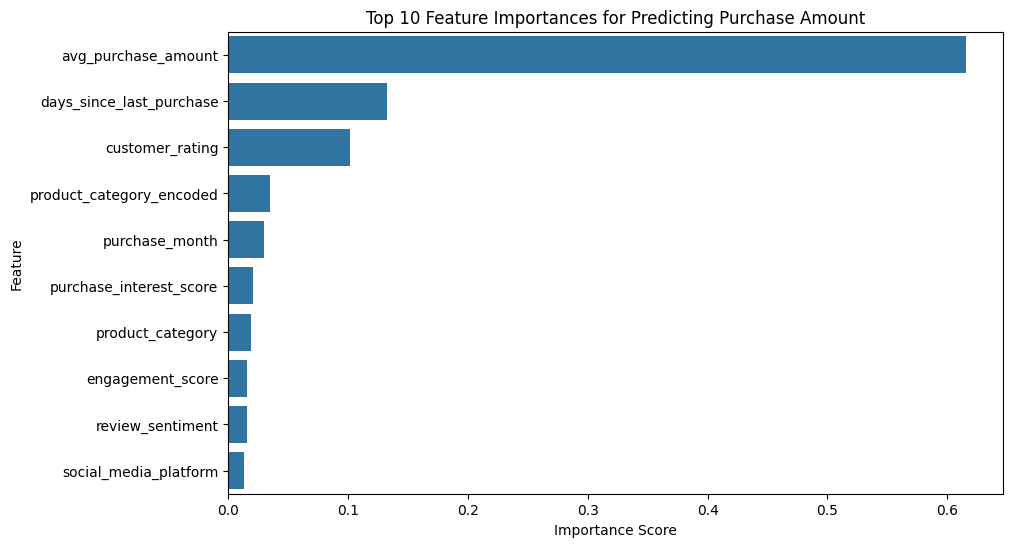

In [39]:
# Getting and displaying feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Feature Importances:\n", importances.head(10))

# Visualizing feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(10).values, y=importances.head(10).index)
plt.title('Top 10 Feature Importances for Predicting Purchase Amount')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Sample Predictions vs Actuals:
      Actual Purchase Amount  Predicted Purchase Amount
256               88.540649                 143.754006
193              158.891312                 239.332689
289              171.430511                 183.794357
15               173.752289                 180.250864
156              437.390460                 442.650594


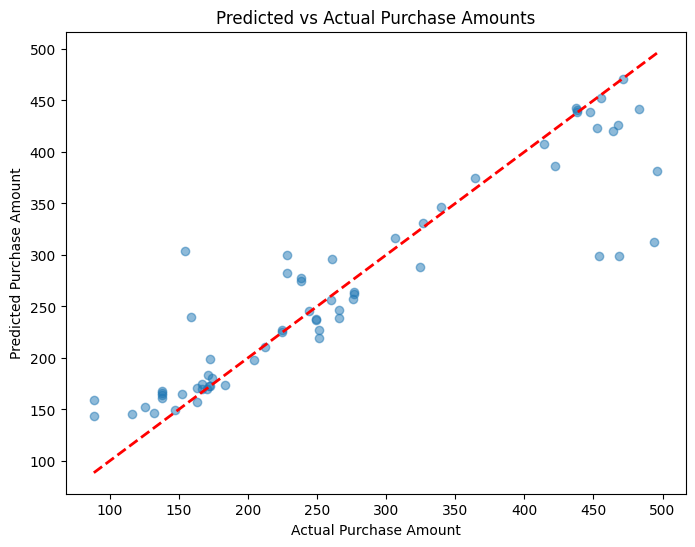

In [40]:
# Selecting a few test samples for prediction
sample_indices = X_test.index[:5]
sample_X = X_test.loc[sample_indices]
sample_y_actual = y_test.loc[sample_indices]
sample_y_pred = rf.predict(sample_X)

# Displaying predictions vs actuals
results = pd.DataFrame({
    'Actual Purchase Amount': sample_y_actual,
    'Predicted Purchase Amount': sample_y_pred
}, index=sample_indices)
print("Sample Predictions vs Actuals:\n", results)

# Visualizing predictions vs actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Predicted vs Actual Purchase Amounts')
plt.show()

Length of y_test: 65
Length of y_pred: 65
Length of X_test: 65
Shape of test_df: (65, 16)


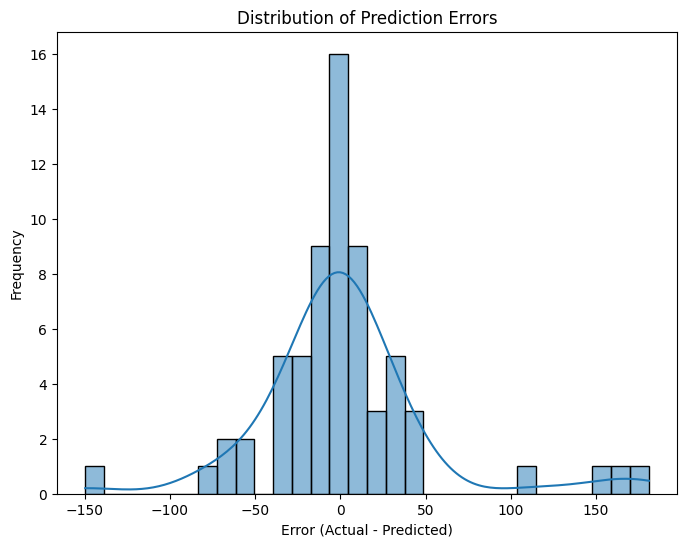

Average Prediction Error by Product Category:
 product_category
0     3.163170
1    36.597613
2     5.456879
3   -10.184499
4    -9.917838
Name: Error, dtype: float64

Number of Test Samples per Product Category:
 product_category
0    19
3    16
4    13
1    10
2     7
Name: count, dtype: int64


In [41]:
# Calculating prediction errors
errors = y_test - y_pred

# Verifying lengths match
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))
print("Length of X_test:", len(X_test))

# Creating test DataFrame with proper index alignment
test_df = df_ml.loc[X_test.index].copy()
print("Shape of test_df:", test_df.shape)

# Assigning predictions and errors with explicit index alignment
test_df['Predicted'] = pd.Series(y_pred, index=X_test.index)
test_df['Error'] = pd.Series(errors, index=X_test.index)

# Plotting error distribution
plt.figure(figsize=(8, 6))
sns.histplot(test_df['Error'], bins=30, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

# Analyzing errors by product category
error_by_category = test_df.groupby('product_category')['Error'].mean()
print("Average Prediction Error by Product Category:\n", error_by_category)

#  Displaying number of samples per category
category_counts = test_df['product_category'].value_counts()
print("\nNumber of Test Samples per Product Category:\n", category_counts)